In [273]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import geopandas as gpd

# Ładowanie danych - GUS

In [274]:
df = pd.read_csv('data_crimes.csv',sep=";", quotechar='"')

print(df)

                  Nazwa  1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]  \
0                POLSKA                                             181162    
1          DOLNOŚLĄSKIE                                              17437    
2    KUJAWSKO-POMORSKIE                                               8804    
3             LUBELSKIE                                               6655    
4              LUBUSKIE                                               6037    
5               ŁÓDZKIE                                              10733    
6           MAŁOPOLSKIE                                              18748    
7           MAZOWIECKIE                                              24765    
8              OPOLSKIE                                               4157    
9          PODKARPACKIE                                               4826    
10            PODLASKIE                                               4114    
11            POMORSKIE                             

# Preprocessing

### Zmienianie kolumn na wiersze

In [275]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Nazwa
1: 1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]
2: 1 kwartał;przestępstwa stwierdzone;ogółem;2017;[-]
3: 1 kwartał;przestępstwa stwierdzone;ogółem;2018;[-]
4: 1 kwartał;przestępstwa stwierdzone;ogółem;2019;[-]
5: 1 kwartał;przestępstwa stwierdzone;ogółem;2020;[-]
6: 1 kwartał;przestępstwa stwierdzone;ogółem;2021;[-]
7: 1 kwartał;przestępstwa stwierdzone;ogółem;2022;[-]
8: 1 kwartał;przestępstwa stwierdzone;ogółem;2023;[-]
9: 1 kwartał;przestępstwa stwierdzone;ogółem;2024;[-]
10: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2016;[-]
11: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2017;[-]
12: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2018;[-]
13: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2019;[-]
14: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2020;[-]
15: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2021;[-]
16: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminal

In [276]:
df_long = df.melt(id_vars=['Nazwa'],    #zostawiamy
                  var_name='Okres',     #Nowa Kolumna
                  value_name='Liczba')  #Kolumna dla wartości

df_long

,Nazwa,Okres,Liczba
0,POLSKA,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,181162.0
1,DOLNOŚLĄSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,17437.0
2,KUJAWSKO-POMORSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,8804.0
3,LUBELSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6655.0
4,LUBUSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6037.0
...,...,...,...
10399,ŚLĄSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4876.0
10400,ŚWIĘTOKRZYSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,1271.0
10401,WARMIŃSKO-MAZURSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4404.0
10402,WIELKOPOLSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,7953.0


In [277]:
column_parts = df_long['Okres'].str.split(';', expand=True)
column_parts

,0,1,2,3,4
0,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
1,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
2,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
3,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
4,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
...,...,...,...,...,...
10399,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10400,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10401,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10402,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]


In [278]:
df_long['Kwartał'] = column_parts[0] 
df_long['Przestępstwo'] = column_parts[2]
df_long['Rok'] = column_parts[3]
df_long['Województwo'] = df_long['Nazwa']

# Final DataFrame
df_final = df_long[['Województwo', 'Przestępstwo', 'Kwartał', 'Rok', 'Liczba']]

# Sorting
df_final = df_final.sort_values(['Rok', 'Kwartał'])


df_final.head(15)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
5,ŁÓDZKIE,ogółem,1 kwartał,2016,10733.0
6,MAŁOPOLSKIE,ogółem,1 kwartał,2016,18748.0
7,MAZOWIECKIE,ogółem,1 kwartał,2016,24765.0
8,OPOLSKIE,ogółem,1 kwartał,2016,4157.0
9,PODKARPACKIE,ogółem,1 kwartał,2016,4826.0


In [279]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  object 
 4   Liczba        7684 non-null   float64
dtypes: float64(1), object(4)
memory usage: 487.7+ KB


In [280]:
df_final["Rok"] = df_final["Rok"].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  int64  
 4   Liczba        7684 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 487.7+ KB


### Usuwanie przestępstw łączonych ("razem")

In [281]:
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji razem',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności, wolności sumienia, wolności seksualnej i obyczajności razem',
       'przeciwko wolności i wolności sumienia razem',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [282]:
df_final = df_final[ ~df_final['Przestępstwo'].str.contains("razem", case=False, na=False)]
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

### Obliczanie kwartałów i daty

In [283]:
df_final["Kwartał"].unique()

array(['1 kwartał', '1-3 kwartały', 'pierwsze półrocze', 'rok'],
      dtype=object)

In [284]:
#Wyodrębienie okresów czasu, aby obliczyć wszystkie kwartały

Q1 = df_final[df_final["Kwartał"] == "1 kwartał"]
Q12 = df_final[df_final["Kwartał"] == "pierwsze półrocze"]
Q13 =  df_final[df_final["Kwartał"] == "1-3 kwartały"]
Y =  df_final[df_final["Kwartał"] == "rok"]

#Kwartał 2
Q2 = pd.merge(
    Q1, Q12,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q1", "_Q12")
)

Q2["Liczba"] = Q2["Liczba_Q12"] - Q2["Liczba_Q1"]
Q2["Kwartał"] = "2 kwartał"
Q2= Q2.drop(["Kwartał_Q1", "Liczba_Q1", "Kwartał_Q12", "Liczba_Q12"], axis=1)




#Kwartał 3
Q3 = pd.merge(
    Q12, Q13,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q12", "_Q13")
)

Q3["Liczba"] = Q3["Liczba_Q13"] - Q3["Liczba_Q12"]
Q3["Kwartał"] = "3 kwartał"
Q3= Q3.drop(["Kwartał_Q12", "Liczba_Q12", "Kwartał_Q13", "Liczba_Q13"], axis=1)


#Kwartał 4
Q4 = pd.merge(
    Q13, Y,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q13", "_Y")
)

Q4["Liczba"] = Q4["Liczba_Y"] - Q4["Liczba_Q13"]
Q4["Kwartał"] = "4 kwartał"
Q4= Q4.drop(["Kwartał_Q13", "Liczba_Q13", "Kwartał_Y", "Liczba_Y"], axis=1)

df_final = pd.concat([df_final, Q2, Q3, Q4], ignore_index=True)
df_final

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1168.0
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,356.0
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,429.0
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1454.0


In [285]:
df_final["Kwartał"].unique()

array(['1 kwartał', '1-3 kwartały', 'pierwsze półrocze', 'rok',
       '2 kwartał', '3 kwartał', '4 kwartał'], dtype=object)

In [286]:
df_final = df_final[ ~df_final['Kwartał'].str.contains("pierwsze półrocze|1-3 kwartały", case=False, na=False)]
df_final['Kwartał'].unique()

array(['1 kwartał', 'rok', '2 kwartał', '3 kwartał', '4 kwartał'],
      dtype=object)

In [287]:
mapa_kwartał = {
    "1 kwartał": 1,
    "2 kwartał": 2,
    "3 kwartał": 3,
    "4 kwartał": 4,
    "rok": 0
}

df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)

C:\Users\Wiola\AppData\Local\Temp\ipykernel_21988\1067151899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)


In [288]:
#tworzymy nową kolumnę zawierającą dany rok i kwartał
df_final = df_final.sort_values(['Rok', 'Kwartał'])
df_final['Data'] = df_final['Rok'].astype(str) + '-Q' + df_final['Kwartał'].astype(str)


In [289]:
df_final.reset_index(drop=True)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data
0,POLSKA,ogółem,0,2016,748459.0,2016-Q0
1,DOLNOŚLĄSKIE,ogółem,0,2016,74705.0,2016-Q0
2,KUJAWSKO-POMORSKIE,ogółem,0,2016,37144.0,2016-Q0
3,LUBELSKIE,ogółem,0,2016,31221.0,2016-Q0
4,LUBUSKIE,ogółem,0,2016,22775.0,2016-Q0
...,...,...,...,...,...,...
10705,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,2024-Q4
10706,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,2024-Q4
10707,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,2024-Q4
10708,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,2024-Q4


### Label Encoding

In [290]:
le = LabelEncoder()
df_final['Przestępstwo_ID'] = le.fit_transform(df_final['Przestępstwo'])
df_final['Województwo_ID'] = le.fit_transform(df_final['Województwo'])

In [291]:
id_map = df_final[['Przestępstwo_ID', 'Przestępstwo']].drop_duplicates().sort_values('Przestępstwo_ID')
id_map

,Przestępstwo_ID,Przestępstwo
748,0,o charakterze gospodarczym
731,1,o charakterze kryminalnym
714,2,ogółem
765,3,przeciwko bezpieczeństwu powszechnemu i bezpie...
850,4,przeciwko działalności instytucji państwowych ...
799,5,przeciwko mieniu
901,6,przeciwko obrotowi gospodarczemu
918,7,przeciwko obrotowi pieniędzmi i papierami wart...
833,8,przeciwko rodzinie i opiece
884,9,przeciwko wiarygodności dokumentów


In [292]:
id_map = df_final[['Województwo_ID', 'Województwo']].drop_duplicates().sort_values('Województwo_ID')
id_map

,Województwo_ID,Województwo
715,0,DOLNOŚLĄSKIE
716,1,KUJAWSKO-POMORSKIE
717,2,LUBELSKIE
718,3,LUBUSKIE
721,4,MAZOWIECKIE
720,5,MAŁOPOLSKIE
722,6,OPOLSKIE
723,7,PODKARPACKIE
724,8,PODLASKIE
714,9,POLSKA


### Missing values

In [293]:
df_null = df_final[df_final.isnull().any(axis=1)]
df_null

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data,Przestępstwo_ID,Województwo_ID
816,POLSKA,przeciwko wolności,0,2016,NaN,2016-Q0,10,9
817,DOLNOŚLĄSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,0
818,KUJAWSKO-POMORSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,1
819,LUBELSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,2
820,LUBUSKIE,przeciwko wolności,0,2016,NaN,2016-Q0,10,3
...,...,...,...,...,...,...,...,...
13799,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,15
13800,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,16
13801,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,11
13802,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,2019-Q4,13,12


In [294]:
df_null['Przestępstwo'].unique()

array(['przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [295]:
df_null['Rok'].unique()

array([2016, 2017, 2018, 2019])

#### Data since 2020 - do porównywania wszytskich kategorii

In [296]:
df_since_2020 = df_final.copy()
df_since_2020 = df_since_2020[(df_since_2020['Rok'] != 2016) & (df_since_2020['Rok'] != 2017) & (df_since_2020['Rok'] != 2018) & (df_since_2020['Rok'] != 2019)]
df_since_2020

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Data,Przestępstwo_ID,Województwo_ID
4522,POLSKA,ogółem,0,2020,765408.0,2020-Q0,2,9
4523,DOLNOŚLĄSKIE,ogółem,0,2020,74802.0,2020-Q0,2,0
4524,KUJAWSKO-POMORSKIE,ogółem,0,2020,37172.0,2020-Q0,2,1
4525,LUBELSKIE,ogółem,0,2020,29057.0,2020-Q0,2,2
4526,LUBUSKIE,ogółem,0,2020,24531.0,2020-Q0,2,3
...,...,...,...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,2024-Q4,13,15
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,2024-Q4,13,16
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,2024-Q4,13,11
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,2024-Q4,13,12


In [297]:
df_since_2020.isnull().sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Liczba             0
Data               0
Przestępstwo_ID    0
Województwo_ID     0
dtype: int64

In [298]:
df_since_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 4522 to 14993
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Województwo      5950 non-null   object 
 1   Przestępstwo     5950 non-null   object 
 2   Kwartał          5950 non-null   int64  
 3   Rok              5950 non-null   int64  
 4   Liczba           5950 non-null   float64
 5   Data             5950 non-null   object 
 6   Przestępstwo_ID  5950 non-null   int64  
 7   Województwo_ID   5950 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 418.4+ KB


# Analiza przestępczości w Polsce

## Wykres dla przestępczości w Polsce - kwartalnie

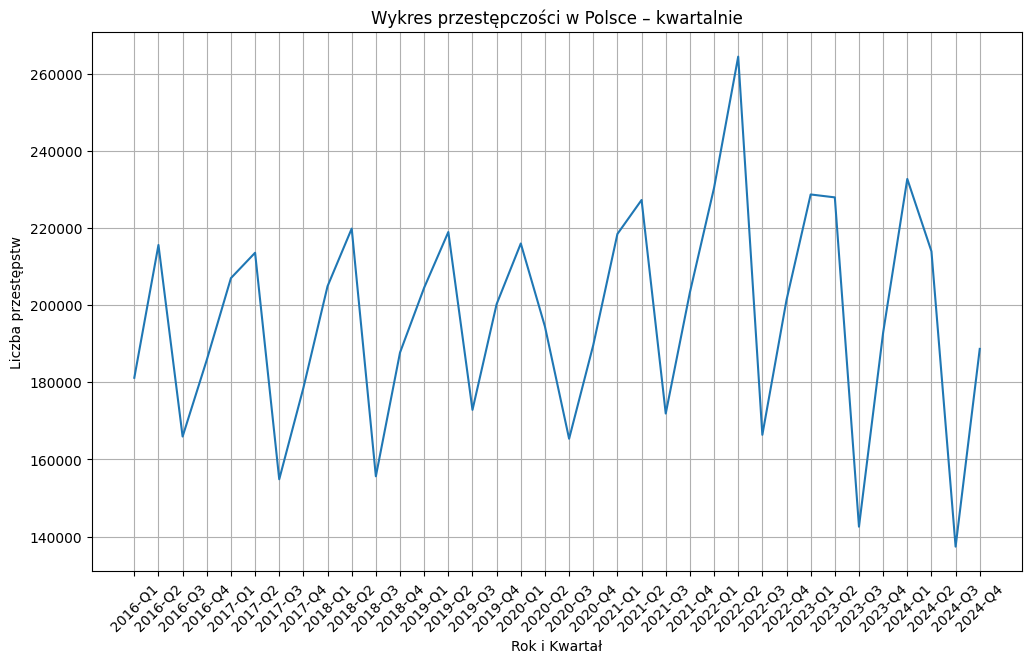

In [299]:
df_poland = df_final[(df_final['Województwo'] == 'POLSKA') & (df_final['Przestępstwo'] == 'ogółem')  & (df_final['Kwartał'] != 0)]

plt.figure(figsize=(12,7))
plt.plot(df_poland['Data'], df_poland['Liczba'])
plt.title('Wykres przestępczości w Polsce – kwartalnie')
plt.xlabel('Rok i Kwartał')
plt.ylabel('Liczba przestępstw')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Analiza kwartalna

### Wykres dla sumy przestępstw wedgłu kwartałów 

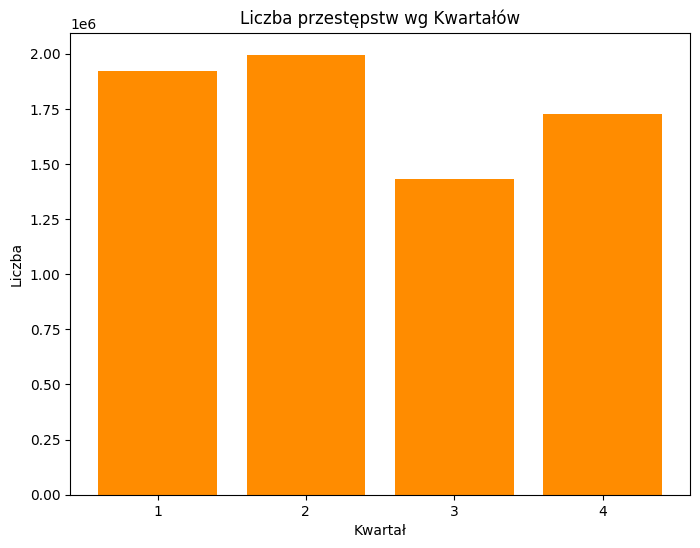

In [300]:
#grupujemy dane Polski według kwartałów i sumujemy
poland_sum = df_poland.groupby('Kwartał')['Liczba'].sum()


plt.figure(figsize=(8,6))
plt.bar(poland_sum.index, poland_sum.values, color='darkorange')
plt.title('Liczba przestępstw wg Kwartałów')
plt.ylabel('Liczba')
plt.xlabel('Kwartał')
plt.xticks([1, 2, 3, 4], labels=['1', '2', '3', '4'])
plt.show()

### Wykres dla kwartalnych trendów w czasie

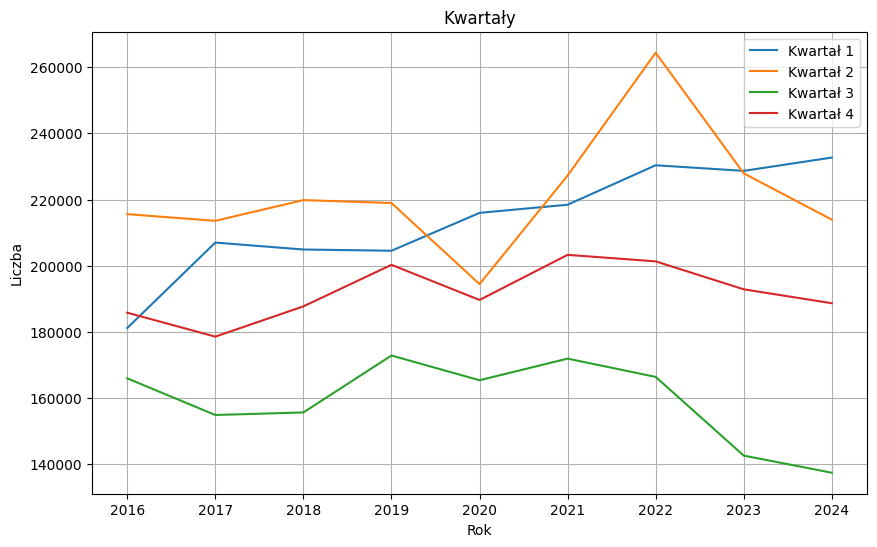

In [301]:
plt.figure(figsize=(10, 6)) 
for i in df_poland['Kwartał'].unique():
    df = df_poland[df_poland["Kwartał"] == i]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label='Kwartał ' + i.astype(str))


plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Kwartały')
plt.legend()
plt.grid(True)
plt.show()

## Najczęstsze i najrzadsze przestepstwa w Polsce od 2020 roku

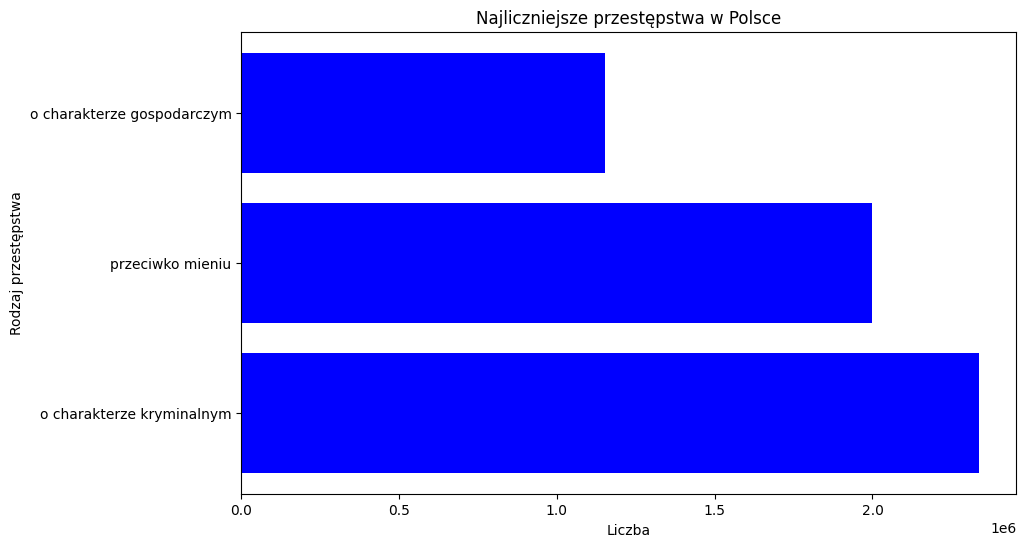

In [302]:
df_top_crimes = df_since_2020[(df_since_2020['Województwo'] == 'POLSKA') & (df_since_2020['Przestępstwo'] != 'ogółem')  & (df_since_2020['Kwartał'] == 0)]

crime_sum = df_top_crimes.groupby('Przestępstwo')['Liczba'].sum()
top3 = crime_sum.nlargest(3)


plt.figure(figsize=(10,6))
plt.barh(top3.index, top3.values, color='blue')
plt.title('Najliczniejsze przestępstwa w Polsce')
plt.xlabel('Liczba')
plt.ylabel('Rodzaj przestępstwa')
plt.show()

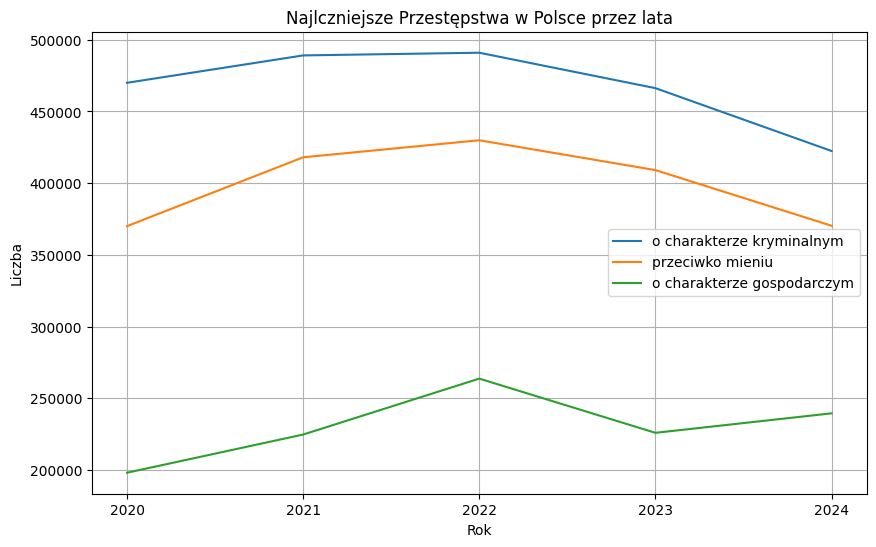

In [303]:
plt.figure(figsize=(10, 6))
for i in range(3):
    df = df_top_crimes[df_top_crimes['Przestępstwo'] == top3.index[i]]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label=(top3.index[i]))

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Najlczniejsze Przestępstwa w Polsce przez lata')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.show()

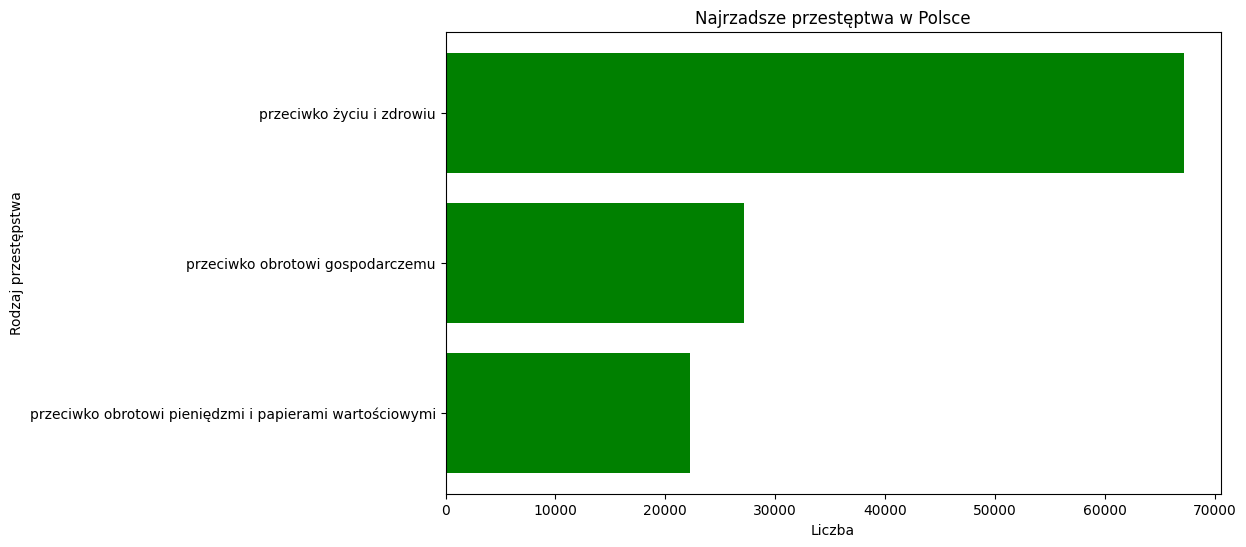

In [304]:
down3 = crime_sum.nsmallest(3)


plt.figure(figsize=(10,6))
plt.barh(down3.index, down3.values, color='green')
plt.title('Najrzadsze przestęptwa w Polsce')
plt.xlabel('Liczba')
plt.ylabel('Rodzaj przestępstwa')
plt.show()

# Analiza przestępczości z podziałem na Województwa

## Mapa Polski dla przestepstw przez wszystkie lata

In [305]:
df_woj = df_final[(df_final["Województwo_ID"] != 9) & (df_final["Przestępstwo_ID"] == 2)& (df_final["Kwartał"] == 0)]
woj_sum = df_woj.groupby('Województwo')['Liczba'].sum().sort_values(ascending=False)

In [306]:
regions = gpd.read_file("wojewodztwa-medium.geojson")
print(regions.head())

   id               nazwa                                           geometry
0   1             śląskie  MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...
1   2            opolskie  POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....
2   3       wielkopolskie  POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...
3   4  zachodniopomorskie  POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...
4   5      świętokrzyskie  POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....


In [307]:
regions['nazwa']=regions['nazwa'].str.upper()
regions_merged = regions.merge(woj_sum, left_on='nazwa', right_on='Województwo', how='left')
regions_merged

,id,nazwa,geometry,Liczba
0,1,ŚLĄSKIE,"MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...",1045054.0
1,2,OPOLSKIE,"POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....",155679.0
2,3,WIELKOPOLSKIE,"POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...",563492.0
3,4,ZACHODNIOPOMORSKIE,"POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...",341173.0
4,5,ŚWIĘTOKRZYSKIE,"POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....",188450.0
5,6,KUJAWSKO-POMORSKIE,"POLYGON ((18.6768 53.6907, 18.6785 53.6908, 18...",360993.0
6,7,PODLASKIE,"POLYGON ((21.926 53.0781, 21.9261 53.0783, 21....",160921.0
7,8,DOLNOŚLĄSKIE,"POLYGON ((16.4162 51.7849, 16.419 51.785, 16.4...",696023.0
8,9,PODKARPACKIE,"POLYGON ((22.5437 50.3563, 22.5459 50.3572, 22...",239961.0
9,10,MAŁOPOLSKIE,"POLYGON ((20.5632 50.1997, 20.5625 50.1991, 20...",679003.0


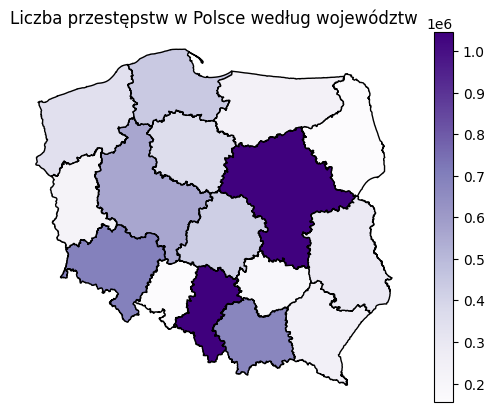

In [308]:
regions_merged.plot(column='Liczba', cmap='Purples', legend=True, edgecolor='black')
plt.title('Liczba przestępstw w Polsce według województw')
plt.axis('off')
plt.show()

## Województwa z największą ilością przestępstw

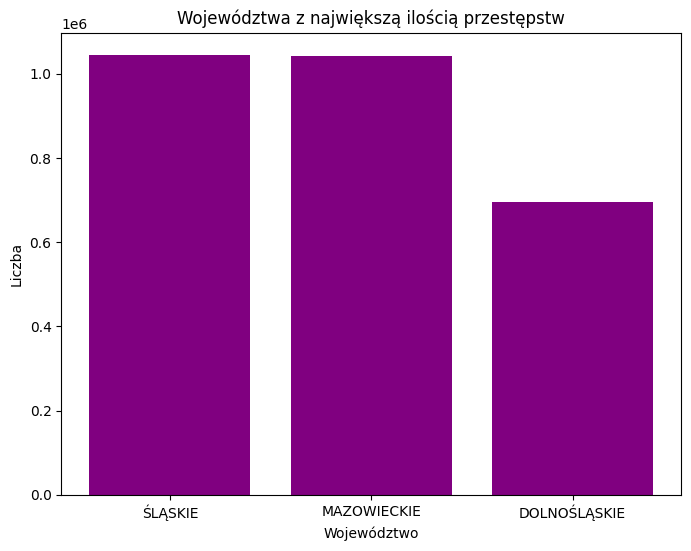

In [309]:
woj_top = woj_sum.nlargest(3)

plt.figure(figsize=(8,6))
plt.bar(woj_top.index, woj_top.values, color='purple')
plt.title('Województwa z największą ilością przestępstw')
plt.ylabel('Liczba')
plt.xlabel('Województwo')
plt.show()

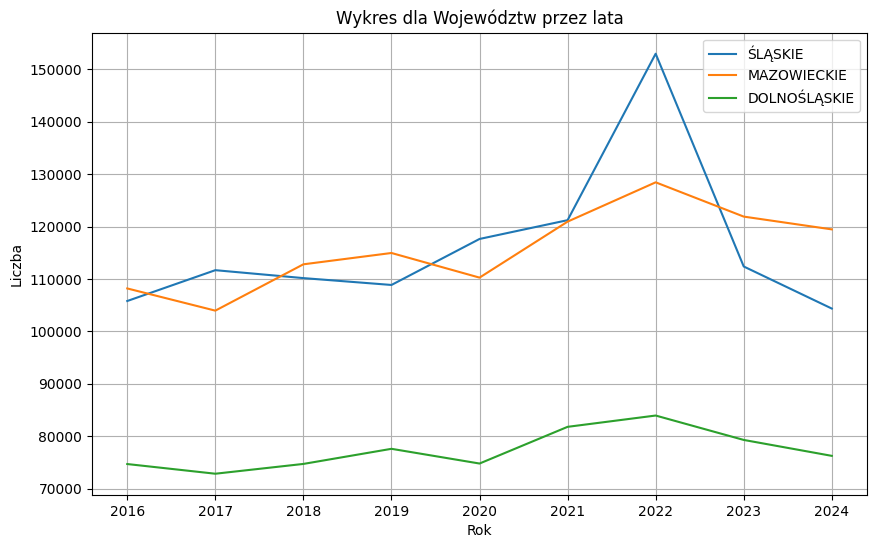

In [310]:
plt.figure(figsize=(10,6))
for i in range(3):
    df = df_woj[df_woj['Województwo'] == woj_top.index[i]]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label=(woj_top.index[i]))

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Wykres dla Województw przez lata')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.show()

# Modele

In [311]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Dane od 2020 roku

In [312]:
df_models_20 = df_since_2020[(df_since_2020['Województwo'] == 'POLSKA') & 
                          (df_since_2020['Przestępstwo'] == 'ogółem')  & 
                          (df_since_2020['Kwartał'] != 0)]

df_models_20 = df_models_20.drop(columns=['Województwo', 'Przestępstwo', 'Przestępstwo_ID', 'Województwo_ID'])
df_models_20['Data']= pd.to_datetime(df_models_20['Data'])
df_models_20 = df_models_20.set_index('Data')
df_models_20

C:\Users\Wiola\AppData\Local\Temp\ipykernel_21988\125858938.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_models_20['Data']= pd.to_datetime(df_models_20['Data'])


,Kwartał,Rok,Liczba
Data,,,
2020-01-01,1,2020,215963.0
2020-04-01,2,2020,194436.0
2020-07-01,3,2020,165370.0
2020-10-01,4,2020,189639.0
2021-01-01,1,2021,218431.0
2021-04-01,2,2021,227240.0
2021-07-01,3,2021,171903.0
2021-10-01,4,2021,203272.0
2022-01-01,1,2022,230360.0


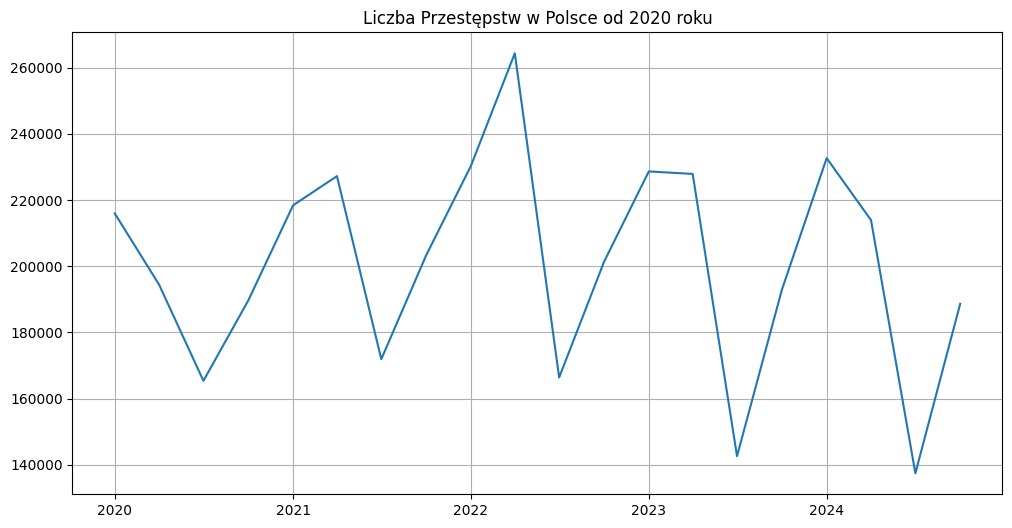

In [313]:
plt.figure(figsize=(12,6))
plt.plot(df_models_20['Liczba'])
plt.grid(True)
plt.title('Liczba Przestępstw w Polsce od 2020 roku')
plt.show()

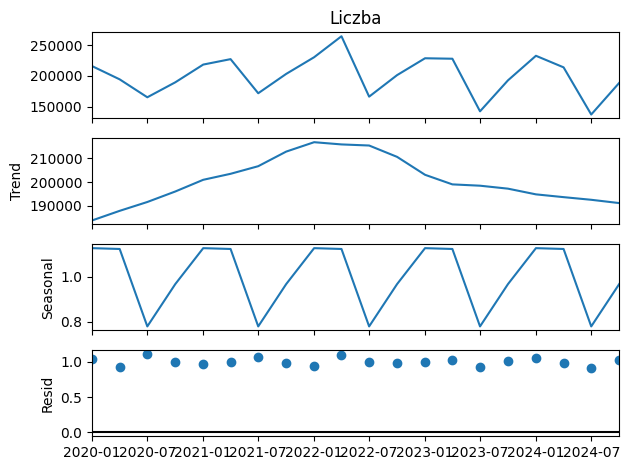

In [314]:
#Trend, seasonal, residuals
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df_models_20['Liczba'], model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.tight_layout()
plt.show()

### XGBoost

In [315]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [379]:
df_xg = df_models_20.copy()
df_xg['lag_1'] = df_xg['Liczba'].shift(1)
df_xg['lag_2'] = df_xg['Liczba'].shift(2)
df_xg['lag_3'] = df_xg['Liczba'].shift(3)
df_xg['lag_4'] = df_xg['Liczba'].shift(4)
df_xg.dropna()

,Kwartał,Rok,Liczba,lag_1,lag_2,lag_3,lag_4
Data,,,,,,,
2021-01-01,1,2021,218431.0,189639.0,165370.0,194436.0,215963.0
2021-04-01,2,2021,227240.0,218431.0,189639.0,165370.0,194436.0
2021-07-01,3,2021,171903.0,227240.0,218431.0,189639.0,165370.0
2021-10-01,4,2021,203272.0,171903.0,227240.0,218431.0,189639.0
2022-01-01,1,2022,230360.0,203272.0,171903.0,227240.0,218431.0
2022-04-01,2,2022,264382.0,230360.0,203272.0,171903.0,227240.0
2022-07-01,3,2022,166383.0,264382.0,230360.0,203272.0,171903.0
2022-10-01,4,2022,201307.0,166383.0,264382.0,230360.0,203272.0
2023-01-01,1,2023,228666.0,201307.0,166383.0,264382.0,230360.0


In [380]:
X = df_xg.drop(columns='Liczba')
y = df_xg['Liczba']

train_size = int(len(df_xg) * 0.8)  
X_train, X_test = X.iloc[:train_size], X.iloc[(train_size):]
y_train, y_test = y.iloc[:train_size], y.iloc[(train_size):]

In [381]:
xg = XGBRegressor(random_state= 7312)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=3,              
)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [382]:
xg = XGBRegressor(random_state= 7312,n_estimators=100, max_depth=3, learning_rate=0.01, subsample=1, colsample_bytree=1)
xg.fit(X_train, y_train)
forecast_xg = xg.predict(X_test)

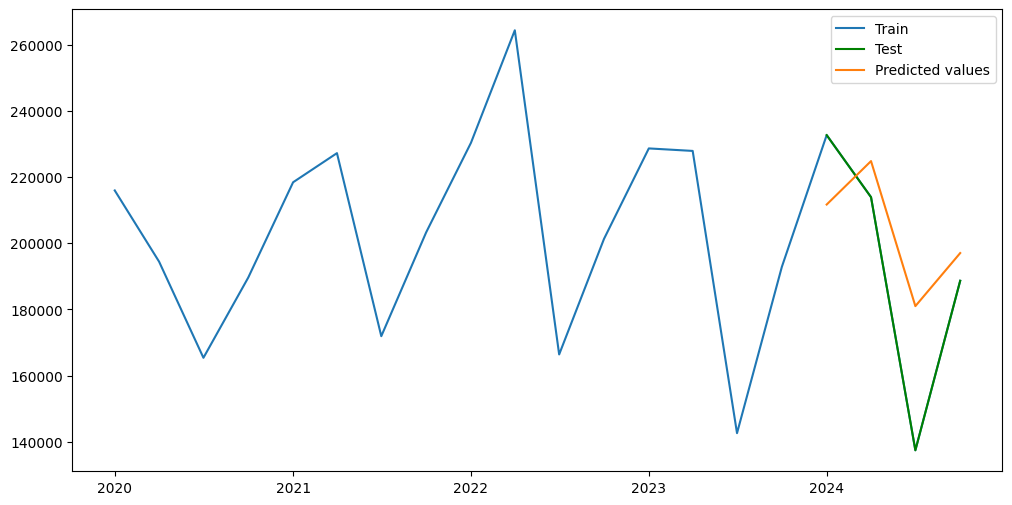

In [383]:
plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index,forecast_xg, label='Predicted values')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(y_test,forecast_xg)
mse = mean_squared_error(y_test, forecast_xg)
r_squared = r2_score(y_test, forecast_xg)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R^2:",r_squared)

20963.85546875
632177562.6244507
0.506334863683283


### Random forest

In [322]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [385]:
rf = RandomForestRegressor()

param_grid = {'n_estimators': [100,200],
              'max_depth': [2,8], 
              'min_samples_leaf': [3,5], 
              'max_features':[3,5]
              }

rf_rscv = RandomizedSearchCV(rf, param_grid, n_iter=100, cv=5)
rf_rscv.fit(X_train, y_train)

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [2, 8],
                                        'max_features': [3, 5],
                                        'min_samples_leaf': [3, 5],
                                        'n_estimators': [100, 200]})

In [386]:
rf_rscv.best_params_

{'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 2}

In [387]:
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=3, max_features=5, max_depth=8)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

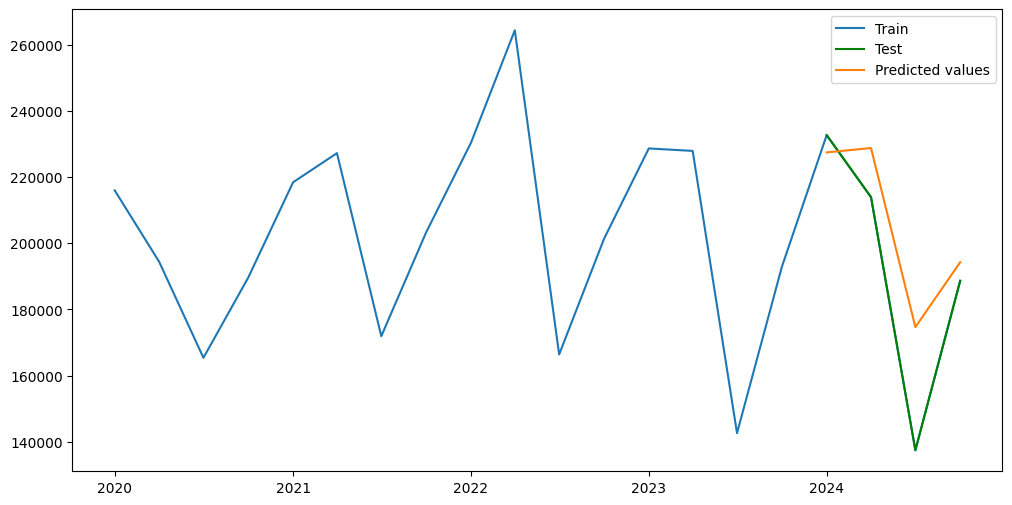

In [388]:
plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, y_pred, label='Predicted values')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R^2:",r_squared)

15729.602678661591
416361566.6207209
0.6748647821514596


### Sarima

In [447]:
df_sarima = df_models_20.copy()

df_sarima = df_sarima.drop(columns=['Rok','Kwartał'])

train_size = int(len(df_sarima) * 0.8)  
train, test = df_sarima.iloc[:train_size], df_sarima.iloc[(train_size):]

#Stationarity test
result = adfuller(df_sarima, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -1.4494570623006229
p-value: 0.5583498046253357
Non-Stationary


In [457]:
df_sarima_diff = df_sarima.diff().dropna()
result = adfuller(df_sarima_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -11.8097925922399
p-value: 8.916842201111305e-22
Stationary


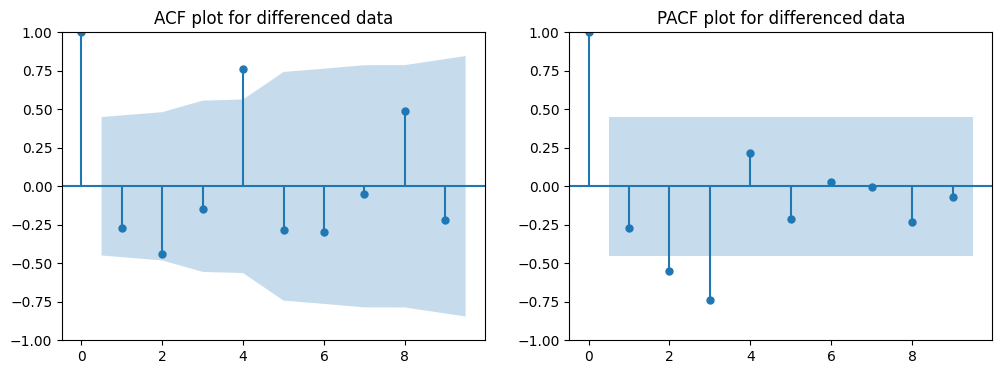

In [478]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_sarima_diff, ax=axes[0], title='ACF plot for differenced data')
plot_pacf(df_sarima_diff, ax=axes[1], title='PACF plot for differenced data')
plt.show()

In [473]:
# Fit Sarima Model
p = 3   #from PACF
d = 1   #data is non-stationary
q = 0   #from ACF

P = 0   #from PACF
D = 1   #after differencing data is stationary
Q = 1   #from ACF
s = 4   #season: quarters


model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()
model_fit_sarima.summary()

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Liczba   No. Observations:                   16
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 4)   Log Likelihood                -123.745
Date:                             Sun, 02 Nov 2025   AIC                            257.489
Time:                                     19:45:46   BIC                            259.479
Sample:                                 01-01-2020   HQIC                           256.235
                                      - 10-01-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1910      0.305     -0.625      0.532      -0.790       0.408
ar.L2          0.1128      0.476      0.237      0.812      -0.819       1.045
ar.L3          0.0215      0.282      0.076      0.939      -0.531       0.574
ma.S.L4       -0.0518      0.368     -0.141      0.888      -0.774       0.670
sigma2      3.947e+08   3.51e-10   1.12e+18      0.000    3.95e+08    3.95e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.20   Prob(JB):                         0.79
Heteroskedasticity (H):              15.43   Skew:                            -0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+34. Standard errors may be unstable.
"""

In [474]:
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

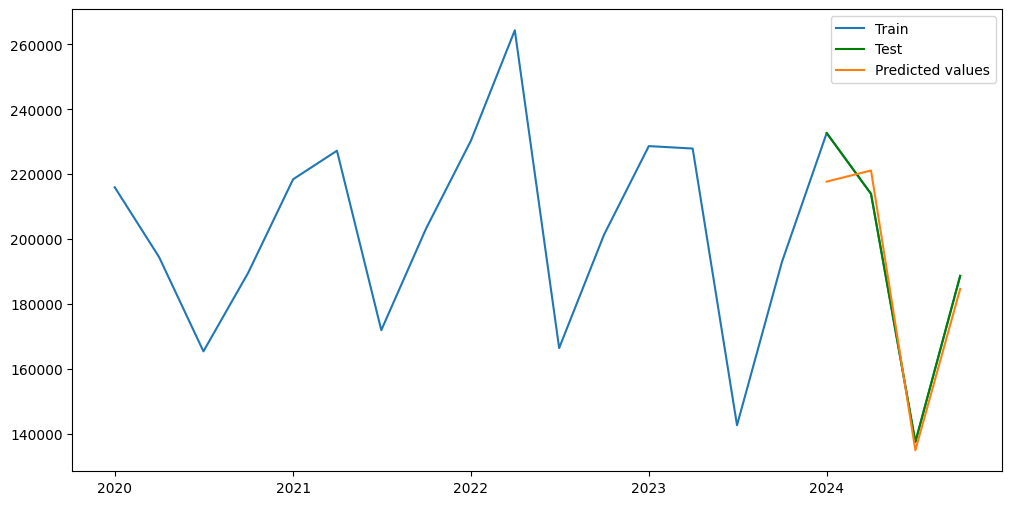

In [475]:
plt.figure(figsize=(12,6))
plt.plot(df_sarima.index, df_sarima, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_sarima, label='Predicted values')
plt.legend()
plt.show()

In [476]:
mae = mean_absolute_error(test,forecast_sarima)
mse = mean_squared_error(test, forecast_sarima)
r_squared = r2_score(test, forecast_sarima)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R^2:",r_squared)

Mean absolute error 7190.931049409985
Mean squared error: 74754915.20921543
R^2: 0.9416241613291407


### Exponential Smoothing

In [336]:
from statsmodels.tsa.api import ExponentialSmoothing

In [419]:
model_ex = ExponentialSmoothing(train, seasonal_periods=4, seasonal='add', trend='add')
model_fit_ex = model_ex.fit()

forecast_ex = model_fit_ex.forecast(steps=len(test))

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


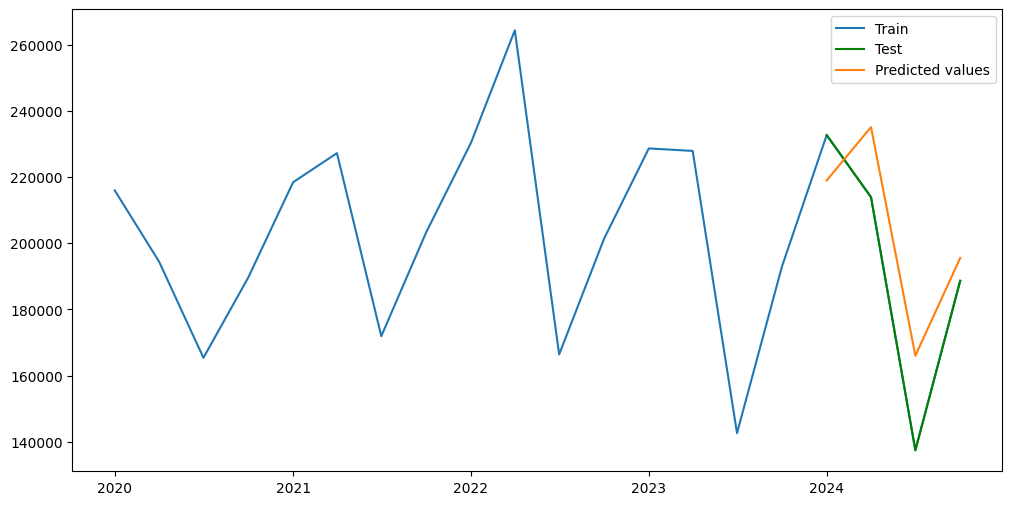

17587.959723286163
375225518.45777804
0.7069877710465179


In [422]:
plt.figure(figsize=(12,6))
plt.plot(df_models_20.index, df_models_20['Liczba'], label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_ex, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(test,forecast_ex)
mse = mean_squared_error(test, forecast_ex)
r_squared = r2_score(test, forecast_ex)

print(mae)
print(mse)
print(r_squared)

## Dane od 2016 roku

In [344]:
df_models_16 = df_final[(df_final['Województwo'] == 'POLSKA') & 
                          (df_final['Przestępstwo'] == 'ogółem')  & 
                          (df_final['Kwartał'] != 0)]

df_models_16 = df_models_16.drop(columns=['Województwo', 'Przestępstwo', 'Przestępstwo_ID', 'Województwo_ID'])
df_models_16['Data']= pd.to_datetime(df_models_16['Data'])
df_models_16 = df_models_16.set_index('Data')

C:\Users\Wiola\AppData\Local\Temp\ipykernel_21988\3839974987.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_models_16['Data']= pd.to_datetime(df_models_16['Data'])


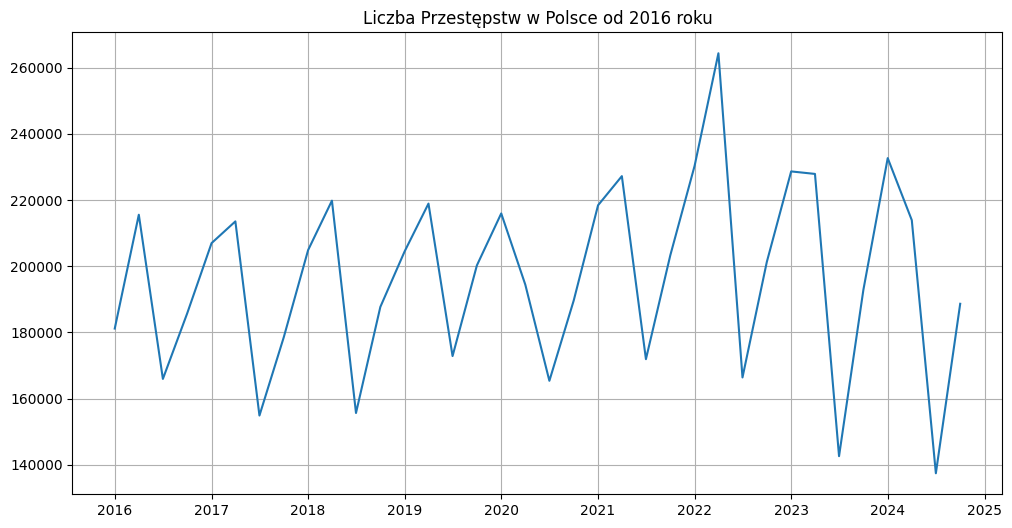

In [342]:
plt.figure(figsize=(12,6))
plt.plot(df_models_16['Liczba'])
plt.grid(True)
plt.title('Liczba Przestępstw w Polsce od 2016 roku')
plt.show()

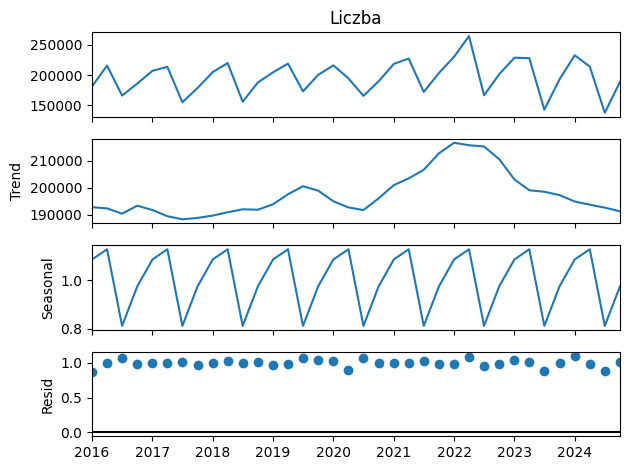

In [343]:
#Trend, seasonal, residuals
result = seasonal_decompose(df_models_16['Liczba'], model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.tight_layout()
plt.show()

### XGBoost

In [356]:
df_xgb = df_models_16.copy()
df_xgb['lag_1'] = df_xgb['Liczba'].shift(1)
df_xgb['lag_2'] = df_xgb['Liczba'].shift(2)
df_xgb['lag_3'] = df_xgb['Liczba'].shift(3)
df_xgb['lag_4'] = df_xgb['Liczba'].shift(4)
df_xgb.dropna()

,Kwartał,Rok,Liczba,lag_1,lag_2,lag_3,lag_4
Data,,,,,,,
2017-01-01,1,2017,206988.0,185783.0,165938.0,215576.0,181162.0
2017-04-01,2,2017,213563.0,206988.0,185783.0,165938.0,215576.0
2017-07-01,3,2017,154862.0,213563.0,206988.0,185783.0,165938.0
2017-10-01,4,2017,178550.0,154862.0,213563.0,206988.0,185783.0
2018-01-01,1,2018,204889.0,178550.0,154862.0,213563.0,206988.0
2018-04-01,2,2018,219826.0,204889.0,178550.0,154862.0,213563.0
2018-07-01,3,2018,155637.0,219826.0,204889.0,178550.0,154862.0
2018-10-01,4,2018,187697.0,155637.0,219826.0,204889.0,178550.0
2019-01-01,1,2019,204517.0,187697.0,155637.0,219826.0,204889.0


In [390]:
X = df_xgb.drop(columns='Liczba')
y = df_xgb['Liczba']

train_size = int(len(df_xgb) * 0.8)  
X_train, X_test = X.iloc[:train_size], X.iloc[(train_size):]
y_train, y_test = y.iloc[:train_size], y.iloc[(train_size):]


xg = XGBRegressor(random_state= 7312)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=3,              
)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


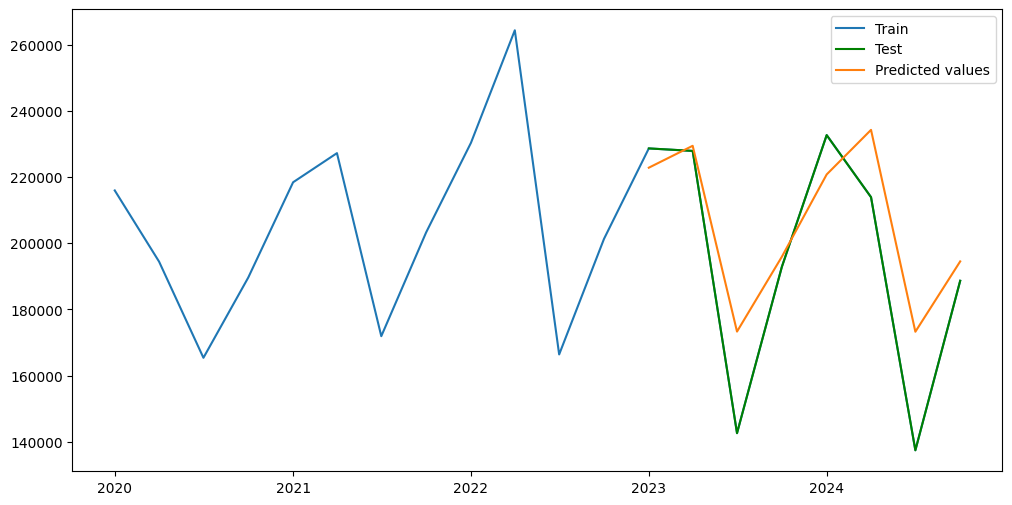

Mean absolute error 14384.939453125
Mean squared error: 357863027.73410034
R^2: 0.7165928676838091


In [415]:
xg = XGBRegressor(random_state= 7312,n_estimators=200, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8)
xg.fit(X_train, y_train)
forecast_xg = xg.predict(X_test)


plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index,forecast_xg, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test,forecast_xg)
mse = mean_squared_error(y_test, forecast_xg)
r_squared = r2_score(y_test, forecast_xg)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R^2:",r_squared)

### Random forest

In [395]:
rf = RandomForestRegressor()

param_grid = {'n_estimators': [100,200],
              'max_depth': [2,8], 
              'min_samples_leaf': [3,5], 
              'max_features':[3,5]
              }

rf_rscv = RandomizedSearchCV(rf, param_grid, n_iter=100, cv=5)
rf_rscv.fit(X_train, y_train)

rf_rscv.best_params_

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 8}

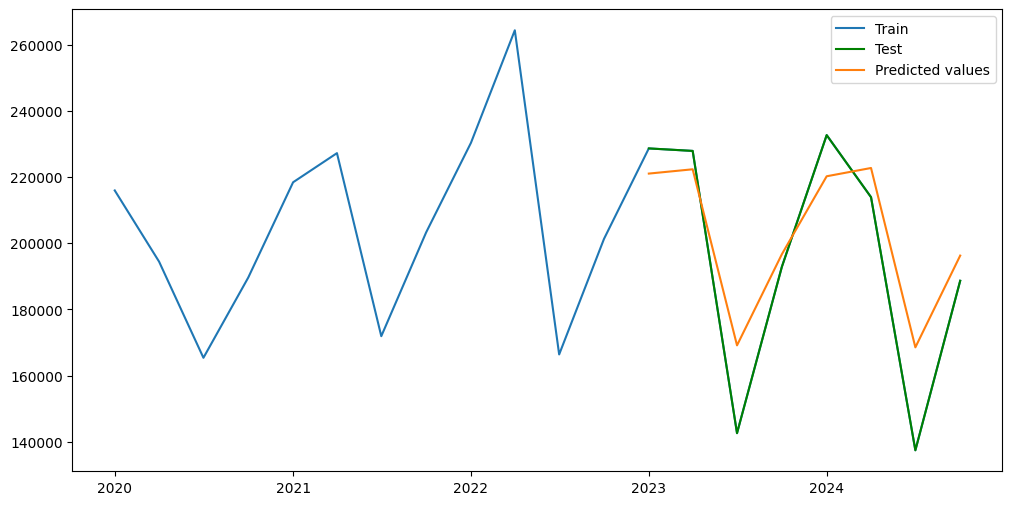

Mean absolute error 12939.48310745852
Mean squared error: 258354211.87324187
R^2: 0.7953981813309627


In [414]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=3, max_depth=8)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(df_xg.index, df_xg['Liczba'], label='Train')
plt.plot(y_test.index, y_test, label='Test', color='green')
plt.plot(y_test.index, y_pred, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R^2:",r_squared)

### SARIMA

In [479]:
df_sarima = df_models_16.copy()

df_sarima = df_sarima.drop(columns=['Rok','Kwartał'])

train_size = int(len(df_sarima) * 0.8)  
train, test = df_sarima.iloc[:train_size], df_sarima.iloc[(train_size):]

#Stationarity test
result = adfuller(df_sarima, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -1.5701494726735663
p-value: 0.49856878736112265
Non-Stationary


In [480]:
df_sarima_diff = df_sarima.diff().dropna()
result = adfuller(df_sarima_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

ADF Statistic: -3.256411304521414
p-value: 0.016942930612156414
Stationary


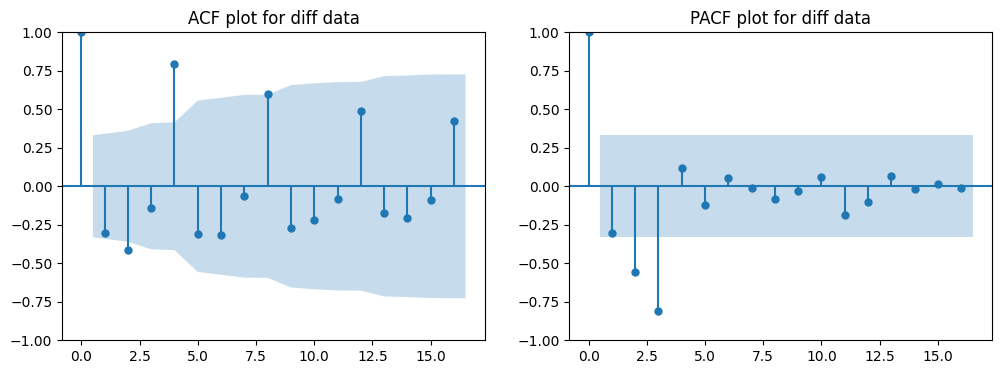

In [481]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_sarima_diff, ax=axes[0], title='ACF plot for diff data')   # ACF
plot_pacf(df_sarima_diff, ax=axes[1], title= 'PACF plot for diff data') # PACF
plt.show()

In [484]:
# Fit Sarima Model
p = 3   #from PACF
d = 1   #data is non-stationary
q = 0   #from ACF

P = 0   #from PACF
D = 1   #after differencing data is stationary
Q = 1   #from ACF
s = 4   #season: quarters


model_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit_sarima = model_sarima.fit()
model_fit_sarima.summary()

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Liczba   No. Observations:                   28
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 4)   Log Likelihood                -257.969
Date:                             Sun, 02 Nov 2025   AIC                            525.939
Time:                                     19:48:46   BIC                            531.616
Sample:                                 01-01-2016   HQIC                           527.367
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0678      0.090      0.757      0.449      -0.108       0.243
ar.L2          0.0519      0.448      0.116      0.908      -0.826       0.930
ar.L3         -0.0516      0.274     -0.188      0.851      -0.588       0.485
ma.S.L4       -0.0263      0.156     -0.168      0.866      -0.333       0.280
sigma2      2.363e+08   1.75e-09   1.35e+17      0.000    2.36e+08    2.36e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.81   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.03   Prob(JB):                         0.39
Heteroskedasticity (H):               6.90   Skew:                            -0.68
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+33. Standard errors may be unstable.
"""

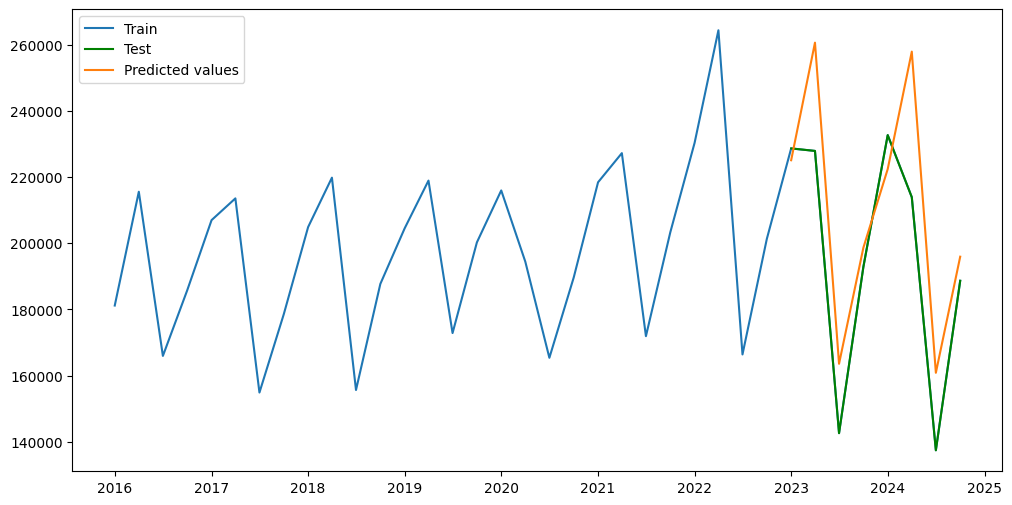

Mean absolute error 18506.142039766208
Mean squared error: 525039121.9776702
R^2: 0.5841989242206278


In [485]:
forecast_sarima = model_fit_sarima.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(df_sarima.index, df_sarima, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_sarima, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(test,forecast_sarima)
mse = mean_squared_error(test, forecast_sarima)
r_squared = r2_score(test, forecast_sarima)

print("Mean absolute error",mae)
print("Mean squared error:",mse)
print("R^2:",r_squared)

### Exponential Smoothing

In [429]:
model_ex = ExponentialSmoothing(train, seasonal_periods=4, seasonal='add', trend='add')
model_fit_ex = model_ex.fit()

forecast_ex = model_fit_ex.forecast(steps=len(test))

c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Wiola\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


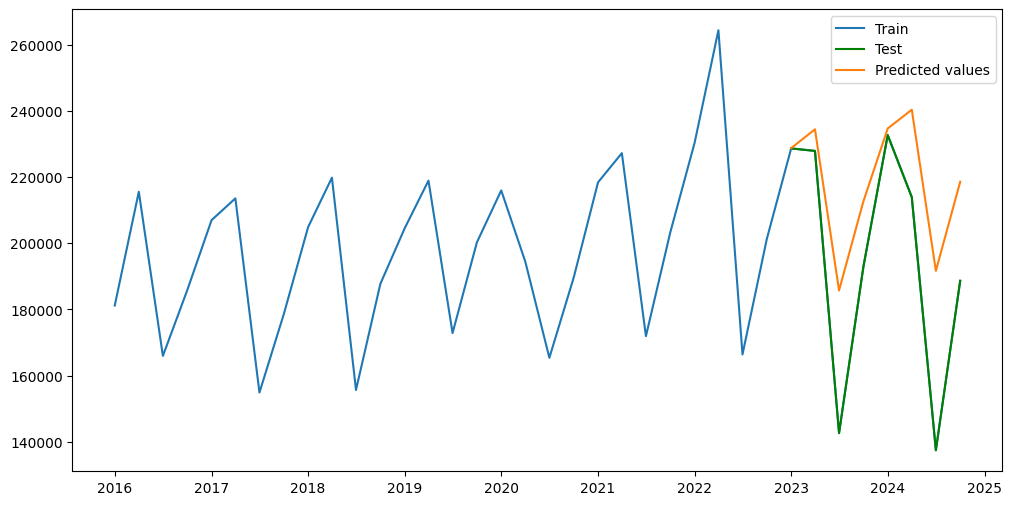

22770.532104345002
854530769.9744275
0.32326030848220544


In [430]:
plt.figure(figsize=(12,6))
plt.plot(df_models_16.index, df_models_16['Liczba'], label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index,forecast_ex, label='Predicted values')
plt.legend()
plt.show()

mae = mean_absolute_error(test,forecast_ex)
mse = mean_squared_error(test, forecast_ex)
r_squared = r2_score(test, forecast_ex)

print(mae)
print(mse)
print(r_squared)

### Long Short-Term Memory (LSTM)